In [2]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
world_df = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [3]:
world_df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [4]:
bitcoin_api_path = "resources/bitcoin_api.csv"
bitcoin_api = pd.read_csv(bitcoin_api_path,low_memory=False)

bitcoin_api.head()

,Unnamed: 0,Country,Market_Cap_BCT,lat,lng
0,0,China,"794,554,852",35.861660,104.195397
1,1,United States of America,"455,746,434",37.090240,-95.712891
2,2,Euro Area,"371,167,734",36.032567,-95.813977
3,3,Japan,"289,864,768",36.204824,138.252924
4,4,United Kingdom,"98,549,461",55.378051,-3.435973


In [5]:
bitcoin_api = bitcoin_api.rename(columns={"Country":"name"})

bitcoin_api.head()

,Unnamed: 0,name,Market_Cap_BCT,lat,lng
0,0,China,"794,554,852",35.861660,104.195397
1,1,United States of America,"455,746,434",37.090240,-95.712891
2,2,Euro Area,"371,167,734",36.032567,-95.813977
3,3,Japan,"289,864,768",36.204824,138.252924
4,4,United Kingdom,"98,549,461",55.378051,-3.435973


In [6]:
# Merge two dataframes using an outer join
merged = world_df.set_index('name').join(bitcoin_api.set_index('name'))

merged

,pop_est,continent,iso_a3,gdp_md_est,geometry,Unnamed: 0,Market_Cap_BCT,lat,lng
name,,,,,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",92.0,"314,886",-6.369028,34.888822
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",9.0,"51,942,858",56.130366,-106.346771
United States of America,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1.0,"455,746,434",37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...
Serbia,7111024,Europe,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",74.0,"741,238",44.016521,21.005859
Montenegro,642550,Europe,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,NaN,NaN
Kosovo,1895250,Europe,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN


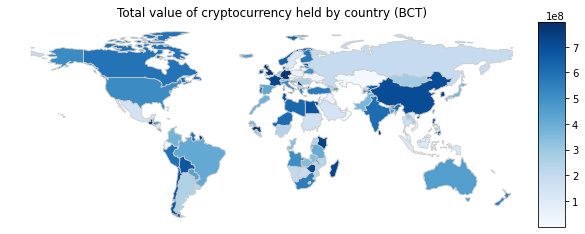

In [9]:
#graph

#set variable
variable = 'Market_Cap_BCT'
# set the range for the choropleth
vmin, vmax = 3, 794554852
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

#plot
country_bit = merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Total value of cryptocurrency held by country (BCT)', fontdict={'fontsize': '12', 'fontweight' : '3'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.02)

# add the colorbar to the figure
cbar = fig.colorbar(sm,cax=cax)

plt.savefig("map_export.png", dpi=300)